In [ ]:
# Imports used in this notebook. This is Python 3 on Jupyter with matplotlib.
%matplotlib inline
import matplotlib.pyplot as plt
import random
import time
from itertools   import permutations, combinations
from functools   import lru_cache as cache
from collections import Counter
from statistics  import mean, median

In [ ]:
def alltours(cities):
    "Return a list of non-redundant tours (permutations of cities)."
    start, *others = cities
    return [[start] + Tour(perm) for perm in permutations(others)]
    
Tour = list  # A Tour is a list of cities

In [ ]:
def exhaustive_tsp(cities):
    "Generate all possible tours of the cities and choose the shortest tour."
    return shortest_tour(alltours(cities))

def shortest_tour(tours): return min(tours, key=tour_length)

# TO DO: Data types: City, Cities, Tour; Functions: alltours, tour_length

In [ ]:
alltours = permutations 
def tour_length(tour):
    """The total of distances between each pair of consecutive cities in the tour.
    This includes the last-to-first, distance(tour[-1], tour[0])"""
    return sum(distance(tour[i - 1], tour[i]) 
               for i in range(len(tour)))

City = complex

def distance(A, B): return abs(A - B)

def Cities(n, seed=391, width=999, height=666):
    "Make a set of n cities, sampled uniformly from a (width x height) rectangle."
    random.seed((n, seed))
    return frozenset(City(random.randint(1, width), random.randint(1, height))
                     for c in range(n))

In [ ]:
def plot_tour(tour, style='bo-'): 
    "Plot every city and link in the tour, and highlight start city."
    if len(tour) > 1000: plt.figure(figsize=(15, 10))
    start = tour[0:1]
    plot_segment(tour + start, style)
    plot_segment(start, 'rD') # start city is red Diamond.
    
def plot_segment(segment, style='bo-'):
    "Plot every city and link in the segment."
    plt.plot([X(c) for c in segment], [Y(c) for c in segment], style, clip_on=False)
    plt.axis('scaled')
    plt.axis('off')
    
def X(city): "X coordinate."; return city.real
def Y(city): "Y coordinate."; return city.imag

In [ ]:
def do(algorithm, cities):
    "Apply a TSP algorithm to cities, plot the result, and print info."
    t0 = time.process_time()
    tour = algorithm(cities)
    t1 = time.process_time()
    assert Counter(tour) == Counter(cities) # Every city appears exactly once in tour
    plt.text(x=461,y=295,s="City A",fontsize=10)
    plt.text(x=471,y=19,s="City B",fontsize=10)
    plt.text(x=631,y=636,s="City C",fontsize=10)
    plt.text(x=734,y=292,s="City D",fontsize=10)
    plt.text(x=74,y=79,s="City E",fontsize=10)
    plot_tour(tour)
    print("{}: {} cities ⇒ tour length {:.0f} (in {:.3f} sec)".format(
          name(algorithm), len(tour), tour_length(tour), t1 - t0))
    
def name(algorithm): return algorithm.__name__.replace('_tsp', '')

In [ ]:
def held_karp_tsp(cities):
    """The Held-Karp shortest tour of this set of cities.
    For each end city C, find the shortest segment from A (the start) to C.
    Out of all these shortest segments, pick the one that is the shortest tour."""
    A = first(cities)
    shortest_segment.cache_clear() # Start a new problem
    return shortest_tour(shortest_segment(A, cities - {A, C}, C)
                         for C in cities - {A})

# TO DO: function: shortest_segment(A, Bs, C)

In [ ]:
@cache(None)
def shortest_segment(A, Bs, C):
    "The shortest segment starting at A, going through all Bs, and ending at C."
    if not Bs:
        return [A, C]
    else:
        return min((shortest_segment(A, Bs - {B}, B) + [C] for B in Bs),
                   key=segment_length)
            
def segment_length(segment):
    "The total of distances between each pair of consecutive cities in the segment."
    # Same as tour_length, but without distance(tour[0], tour[-1])
    return sum(distance(segment[i], segment[i-1]) 
               for i in range(1, len(segment)))

In [ ]:
Cities(5)

frozenset({(461+295j), (471+19j), (631+636j), (734+292j), (74+79j)})

In [ ]:
def first(collection): return next(iter(collection))

In [ ]:
held_karp_tsp(Cities(5))

[(461+295j), (74+79j), (471+19j), (734+292j), (631+636j)]

In [ ]:
tour_length(held_karp_tsp(Cities(5)))

1963.8975686432882

held_karp: 5 cities ⇒ tour length 1964 (in 0.000 sec)


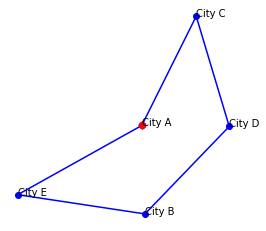

In [ ]:
do(held_karp_tsp,Cities(5))

In [ ]:
for i in range(3,23):
  t0 = time.process_time()
  held_karp_tsp(Cities(i))
  t1 = time.process_time()
  print(i,(t1-t0))

3 8.207100017898483e-05
4 8.044900005188538e-05
5 0.00020540099967547576
6 0.000589410999964457
7 0.0017521019999549026
8 0.006385980999766616
9 0.012790666000000783
10 0.03788206799981708
11 0.09279815499985489
12 0.23953834199983248
13 0.5953177679998589
14 1.4558652800001255
15 3.578760864999822
16 8.693779594000262
17 20.37381683600006
18 47.65585292100013
19 113.56571377299997
20 271.93440059700015
21 676.4614234119999
22 1564.0459096200002
